# Kernel Support Vector Machines (SVMs)

Kernel Support Vector Machines (SVMs) are a powerful extension of the basic SVM algorithm that enable the handling of non-linear decision boundaries. 

The key idea behind kernel SVMs is the use of a kernel function to map the original input features into a higher-dimensional space where a linear separation is possible. 

This allows SVMs to create complex, non-linear boundaries in the original feature space without explicitly computing the coordinates in the higher-dimensional space.

<img src="./images/kernel_svm.webp" height="250px">

## How Kernel SVM Works

1. **Original Space to Feature Space:**
   - In the original input space, data might not be linearly separable. A kernel function transforms this data into a higher-dimensional feature space where it becomes easier to separate using a linear hyperplane.

2. **Kernel Function:**
   - The kernel function computes the inner product of two vectors in the feature space without explicitly mapping them into that space. This is known as the "kernel trick."
   - The kernel function $ K(x, x') $ replaces the dot product $ \phi(x) \cdot \phi(x') $, where $\phi$ is the mapping to the feature space.

3. **Training Phase:**
   - The SVM model uses the kernel function to find the optimal hyperplane in the feature space that maximizes the margin between different classes.

4. **Prediction Phase:**
   - For a new data point, the model uses the kernel function to determine which side of the hyperplane the point falls on and assigns the appropriate class label.


<img src="./images/kernel_map1.png" height="100px" /> 
<img src="./images/kernel_map2.png" height="100px" />
<img src="./images/kernel_map3.png" height="100px" />

## Common Kernel Functions

1. **Linear Kernel:**
   - $ K(x, x') = x \cdot x' $
   - Equivalent to the standard SVM without any transformation.
   - Useful when the data is linearly separable.

2. **Polynomial Kernel:**
   - $ K(x, x') = (x \cdot x' + c)^d $
   - Adds polynomial terms to the decision boundary.
   - Parameters: degree $d$, and constant $c$.

3. **Radial Basis Function (RBF) Kernel / Gaussian Kernel:**
   - $ K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)$
   - Creates a decision boundary based on the distance from the points.
   - Parameters: gamma $\gamma = \frac{1}{2\sigma^2}$.

4. **Sigmoid Kernel:**
   - $ K(x, x') = \tanh(\alpha x \cdot x' + c) $
   - Similar to neural networks.
   - Parameters: slope $\alpha$ and intercept $c$.

## Data preprocessing

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
dataset = pd.read_csv('./data/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training

### Training the Kernel SVM model on the Training set

In [5]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Prediction

### Predicting a new result

In [6]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


### Predicting for test set

In [7]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Visualization

### Visualizing the Training set results

/var/folders/bl/jp2qhy1x18jflnxzchh_m3gc0000gn/T/ipykernel_85447/2540769460.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


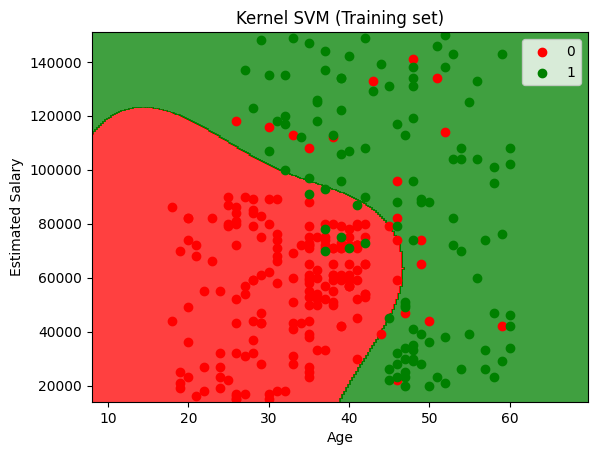

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing the Test set results

/var/folders/bl/jp2qhy1x18jflnxzchh_m3gc0000gn/T/ipykernel_85447/3257738180.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


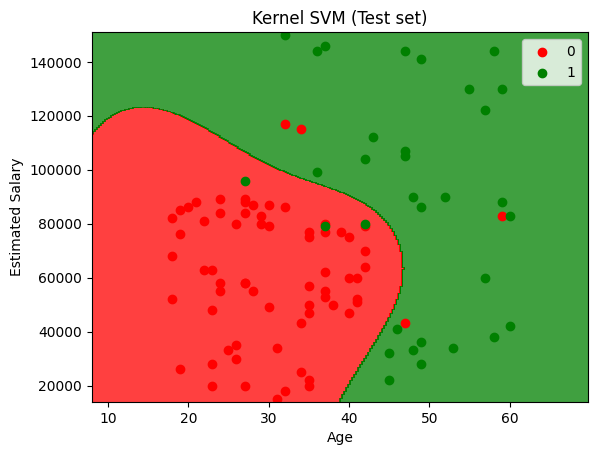

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()